In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
#read the dataset
df = pd.read_csv('/content/3. loan_data_set.csv')
display(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#check the shape of the dataset.
print(df.shape)

(614, 13)


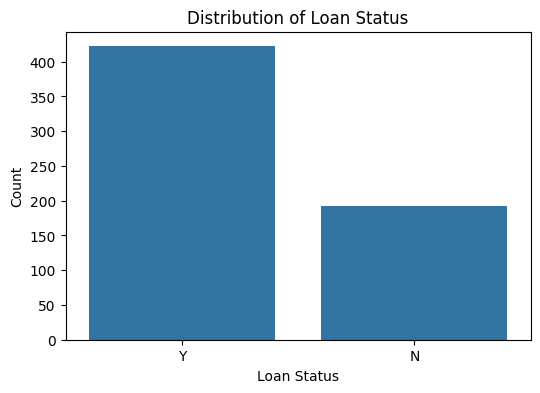

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [5]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [15]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
print("Missing in Gender:", df['Gender'].isnull().sum())

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
print("Missing in Dependents:", df['Dependents'].isnull().sum())
print("Missing in Self_Employed:", df['Self_Employed'].isnull().sum())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
print("Missing in Credit_History:", df['Credit_History'].isnull().sum())

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
print("Missing in Married:", df['Married'].isnull().sum())

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
print("Missing in LoanAmount:", df['LoanAmount'].isnull().sum())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
print("Missing in Loan_Amount_Term:", df['Loan_Amount_Term'].isnull().sum())


Missing in Gender: 0
Missing in Dependents: 0
Missing in Self_Employed: 0
Missing in Credit_History: 0
Missing in Married: 0
Missing in LoanAmount: 0
Missing in Loan_Amount_Term: 0


In [16]:
df = df.drop('Loan_ID', axis=1)
display(df.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
#Target Encoding
#Loan_Status: Convert Y → 1 and N → 0.

df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [18]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education',
                                 'Self_Employed', 'Property_Area', 'Dependents'],
                    drop_first=True)

In [19]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (491, 14)
Shape of X_test: (123, 14)
Shape of y_train: (491,)
Shape of y_test: (123,)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.7886178861788617
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

ROC AUC Score: 0.7030523255813954


TN (0 predicted as 0): 18

FP (0 predicted as 1): 25 → lots of rejections predicted as approvals

FN (1 predicted as 0): 1 → very few approvals predicted as rejections

TP (1 predicted as 1): 79

Interpretation:

Model is very good at predicting approvals (1).

Model is poor at predicting rejections (0).

This is common when the dataset is imbalanced.

Interpretation:

Model is very good at predicting approvals (1).

Model is poor at predicting rejections (0).

This is common when the dataset is imbalanced.

Model is biased toward approvals (1).

Problem: high false negatives for rejected loans → risky for decision-making (may approve risky applicants).

In [25]:
model = LogisticRegression(max_iter=5000, class_weight='balanced')


In [26]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [28]:
# Train predictions
y_train_pred = model.predict(X_train_scaled)

# Test predictions
y_test_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"--- {dataset_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))
    print("\n")

evaluate_model(y_train, y_train_pred, dataset_name="Train")
evaluate_model(y_test, y_test_pred, dataset_name="Test")


--- Train Evaluation ---
Accuracy: 0.7657841140529531
Confusion Matrix:
 [[ 89  60]
 [ 55 287]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       149
           1       0.83      0.84      0.83       342

    accuracy                           0.77       491
   macro avg       0.72      0.72      0.72       491
weighted avg       0.76      0.77      0.76       491

ROC AUC Score: 0.7182483613956592


--- Test Evaluation ---
Accuracy: 0.7479674796747967
Confusion Matrix:
 [[23 20]
 [11 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.53      0.60        43
           1       0.78      0.86      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.74      0.75      0.74       123

ROC AUC Score: 0.6986918604651163




Compare train vs test metrics:

If train accuracy >> test accuracy → model may be overfitting

If train accuracy ≈ test accuracy but both low → model may be underfitting

If train ≈ test and reasonable → model is balanced and generalizes well

Model performs better on class 1 (approved loans) in both train and test.

Class 0 (rejected loans): Recall lower, but improved on test (53% vs 60% in train).

Train vs Test Accuracy

Train: 76.6%

Test: 74.8%

✅ Close values indicate no severe overfitting (model isn’t just memorizing training data).

Balanced Recall Across Classes

Recall for class 1 (approved) is high in both train (0.84) and test (0.86).

Recall for class 0 (rejected) is moderate but similar in train (0.60) and test (0.53).

✅ Model performance is consistent across datasets.

ROC AUC Comparison

Train AUC: 0.718

Test AUC: 0.699

✅ Small drop shows the model can distinguish between approved and rejected loans reasonably well on unseen data.

F1-scores are stable

F1-scores for both classes are not drastically different between train and test → indicates balanced predictive power.

💡 Summary: The model isn’t overfitting or underfitting drastically; it learned patterns that generalize reasonably well to unseen data.

In [30]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("--- Random Forest Model Evaluation (Train) ---")
print("Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rf))
print("Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_train, y_train_pred_rf))

print("\n--- Random Forest Model Evaluation (Test) ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_pred_rf))

--- Random Forest Model Evaluation (Train) ---
Accuracy: 1.0
Confusion Matrix:
 [[149   0]
 [  0 342]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       342

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

ROC AUC Score: 1.0

--- Random Forest Model Evaluation (Test) ---
Accuracy: 0.7804878048780488
Confusion Matrix:
 [[19 24]
 [ 3 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123

ROC AUC Score: 0.7021802325581395
